### Import the all the libraries

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')

In [2]:
train_df['humidity'] = pd.to_numeric(train_df['humidity'], errors='coerce') 
train_df['humidity'] = train_df['humidity'].astype(float)
#train_df['humidity'] = train_df['humidity'].unique()


In [3]:
train_df['wind_speed'] = pd.to_numeric(train_df['wind_speed'], errors='coerce')

In [4]:
train_df['wind_speed'] = train_df['wind_speed'].astype(float)


In [5]:
print(train_df['pressure'].unique())
train_df['pressure'] = pd.to_numeric(train_df['pressure'], errors='coerce')
train_df['pressure'] = train_df['pressure'].astype(float)


['1018.8665053152533' '1025.6238537572883' '1010.9226539809573' ...
 '1009.6844614602336' '1006.6738746072241' '1017.3948041584918']


In [6]:
train_df.dtypes

id                      int64
temperature           float64
irradiance            float64
humidity              float64
panel_age             float64
maintenance_count     float64
soiling_ratio         float64
voltage               float64
current               float64
module_temperature    float64
cloud_coverage        float64
wind_speed            float64
pressure              float64
string_id              object
error_code             object
installation_type      object
efficiency            float64
dtype: object

In [7]:
train_df.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure               135
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [8]:
data_1 = train_df.drop(columns=['string_id','error_code','installation_type'])

In [9]:
print(data_1.corr())

                          id  temperature  irradiance  humidity  panel_age  \
id                  1.000000    -0.002298    0.019788  0.003445  -0.012660   
temperature        -0.002298     1.000000    0.008274  0.002806  -0.009309   
irradiance          0.019788     0.008274    1.000000  0.002707   0.006782   
humidity            0.003445     0.002806    0.002707  1.000000  -0.008319   
panel_age          -0.012660    -0.009309    0.006782 -0.008319   1.000000   
maintenance_count   0.010541    -0.002348   -0.011034 -0.003183  -0.003961   
soiling_ratio      -0.000741     0.006976    0.004839  0.001391   0.000382   
voltage             0.008299    -0.009350    0.258893 -0.001555   0.011674   
current             0.008568     0.007049    0.461028 -0.003524   0.006224   
module_temperature -0.001103     0.909819    0.006734  0.000896  -0.006577   
cloud_coverage      0.004396     0.003824   -0.002959  0.001570   0.000421   
wind_speed         -0.000550    -0.005331   -0.004728  0.001317 

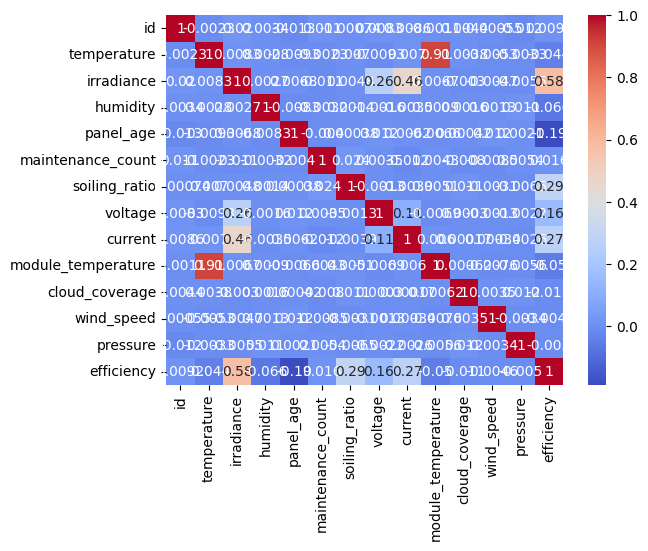

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data_1.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
print(train_df.describe())

                 id   temperature    irradiance      humidity     panel_age  \
count  20000.000000  18999.000000  19013.000000  19873.000000  18989.000000   
mean    9999.500000     25.077241    501.273896     50.066170     17.509758   
std     5773.647028     12.513129    250.926590     28.709656     10.097557   
min        0.000000      0.000000   -597.278646      0.010714      0.001264   
25%     4999.750000     16.853522    332.227277     25.273574      8.777905   
50%     9999.500000     24.720345    499.654730     50.224152     17.497731   
75%    14999.250000     32.848917    668.416734     74.513994     26.340761   
max    19999.000000    147.394168   1537.810349     99.995202     34.998379   

       maintenance_count  soiling_ratio       voltage       current  \
count       18973.000000   18990.000000  19007.000000  19023.000000   
mean            4.012070       0.698879     16.242251      1.713396   
std             2.002268       0.172244     17.889031      1.152953   
min 

In [12]:
train_df

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814400,1010.922654,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.522684,1008.555958,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122,1018.374467,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.976991,1016.081102,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937,1009.684461,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.014702,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158,1006.673875,A1,E00,tracking,0.661963


In [13]:
print(train_df['installation_type'].unique())
print(train_df['installation_type'].unique())

[nan 'dual-axis' 'fixed' 'tracking']
[nan 'dual-axis' 'fixed' 'tracking']


### Analysis


In [14]:
train_df.columns

Index(['id', 'temperature', 'irradiance', 'humidity', 'panel_age',
       'maintenance_count', 'soiling_ratio', 'voltage', 'current',
       'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure',
       'string_id', 'error_code', 'installation_type', 'efficiency'],
      dtype='object')

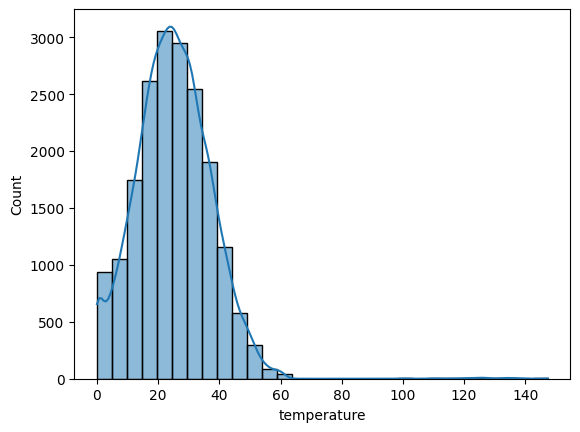

In [15]:
sns.histplot(x='temperature', data=train_df,bins=30, kde=True)
plt.show()


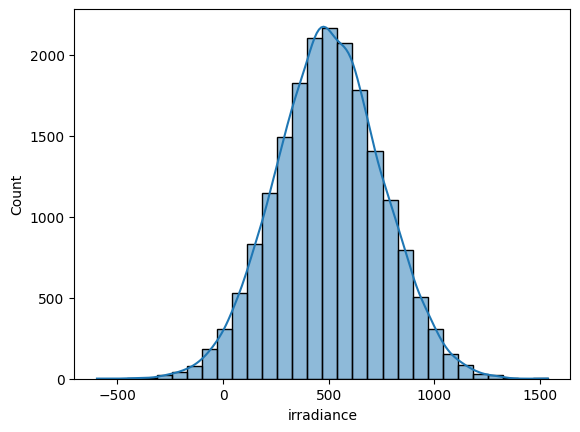

In [16]:
sns.histplot(x='irradiance', data=train_df,bins=30, kde=True)
plt.show()

<Axes: xlabel='installation_type', ylabel='count'>

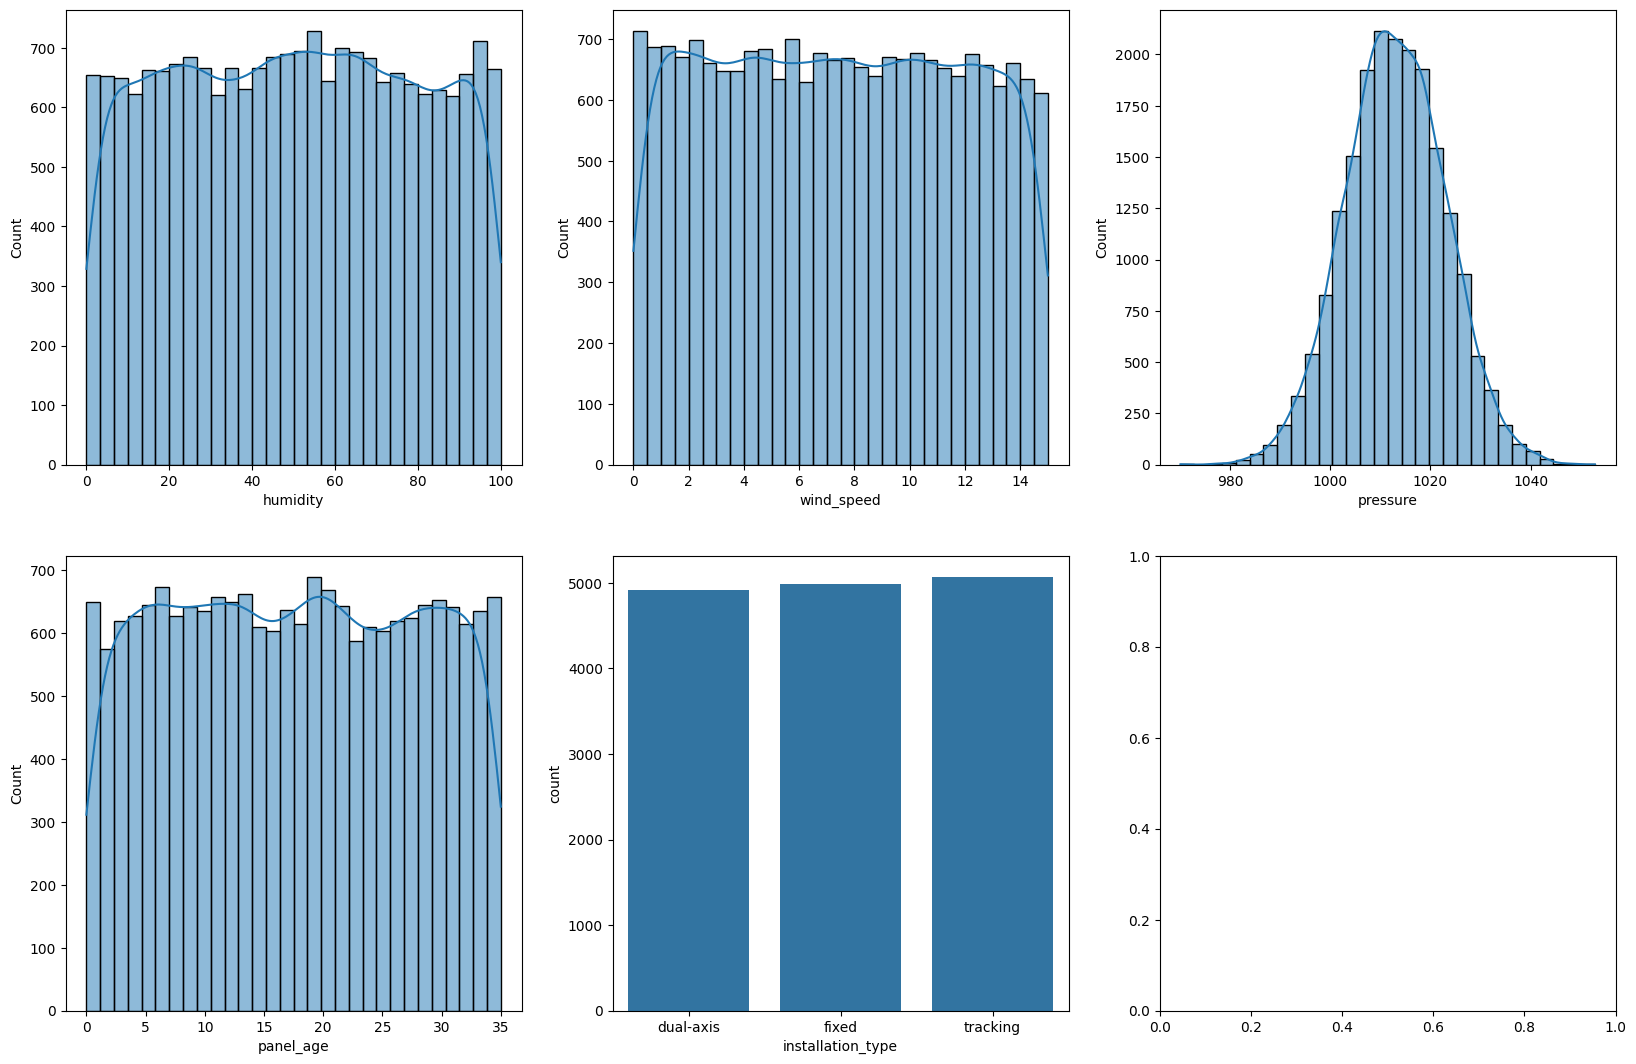

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
sns.histplot(x='humidity', data=train_df, bins=30, kde=True, ax=axes[0, 0])
sns.histplot(x='wind_speed', data=train_df, bins=30, kde=True, ax=axes[0, 1])
sns.histplot(x='pressure', data=train_df, bins=30, kde=True, ax=axes[0, 2])
sns.histplot(x='panel_age', data=train_df, bins=30, kde=True, ax=axes[1, 0])
sns.countplot(x='installation_type', data=train_df, ax=axes[1, 1])



<Axes: xlabel='current', ylabel='Count'>

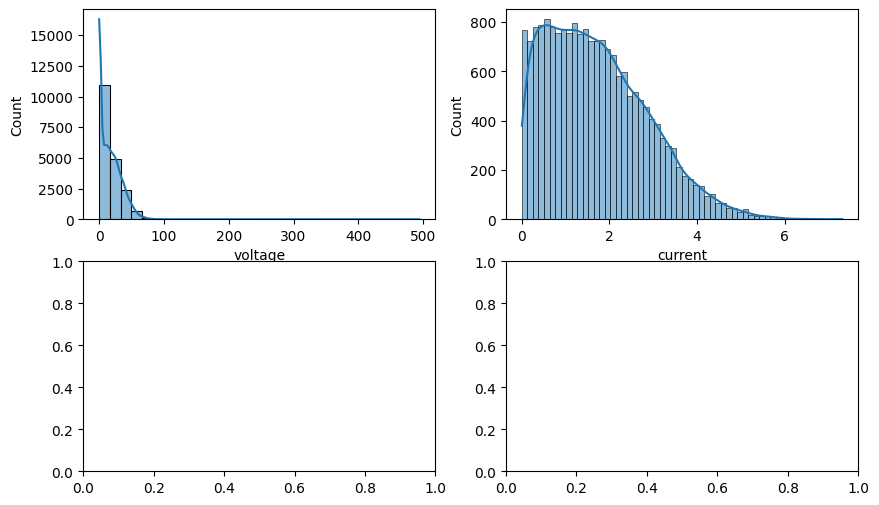

In [18]:
fig, ax = plt.subplots(2,2,figsize=(10, 6))

sns.histplot(x='voltage', data=train_df,bins=30,kde=True, ax=ax[0, 0])
sns.histplot(x='current', data=train_df,kde=True, ax=ax[0, 1])


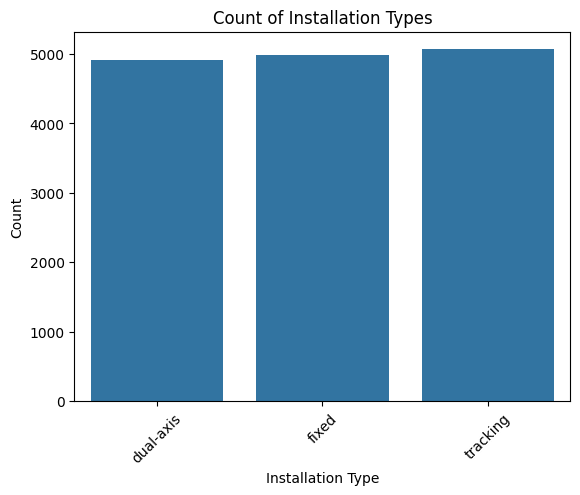

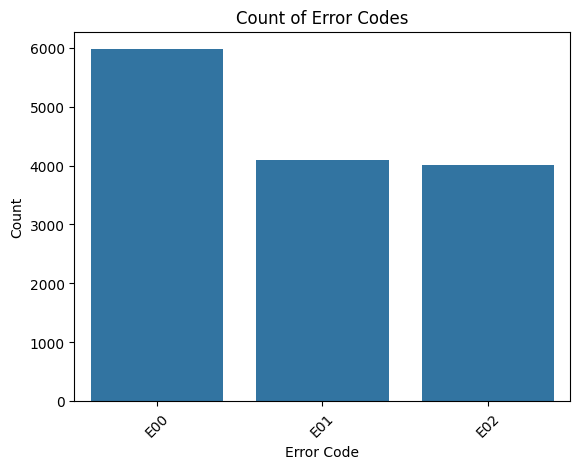

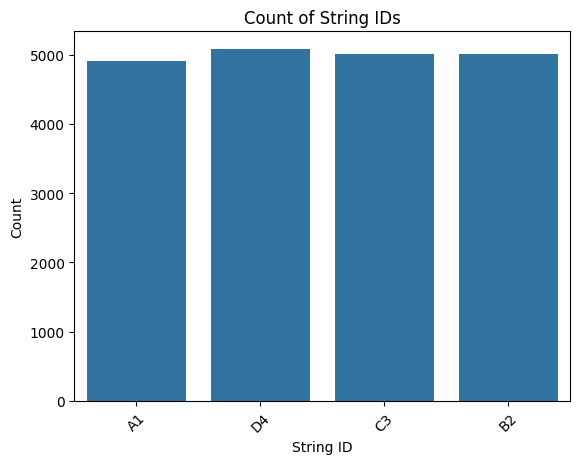

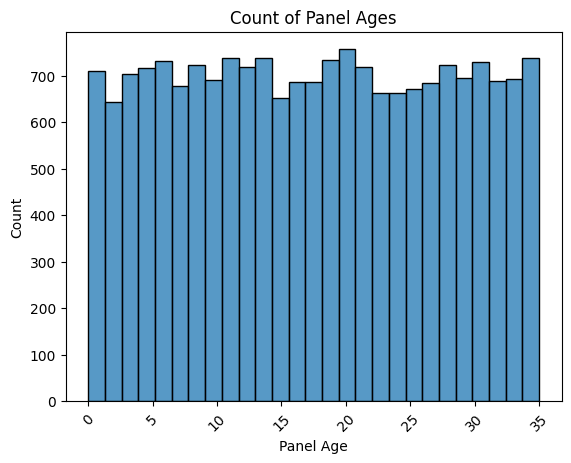

In [19]:
sns.countplot(x='installation_type', data=train_df)
plt.title('Count of Installation Types')
plt.xlabel('Installation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='error_code', data=train_df)
plt.title('Count of Error Codes')
plt.xlabel('Error Code')
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='string_id', data=train_df)
plt.title('Count of String IDs')
plt.xlabel('String ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sns.histplot(x='panel_age', data=train_df)
plt.title('Count of Panel Ages')
plt.xlabel('Panel Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Text(0.5, 1.0, 'Temperature vs Irradiance')

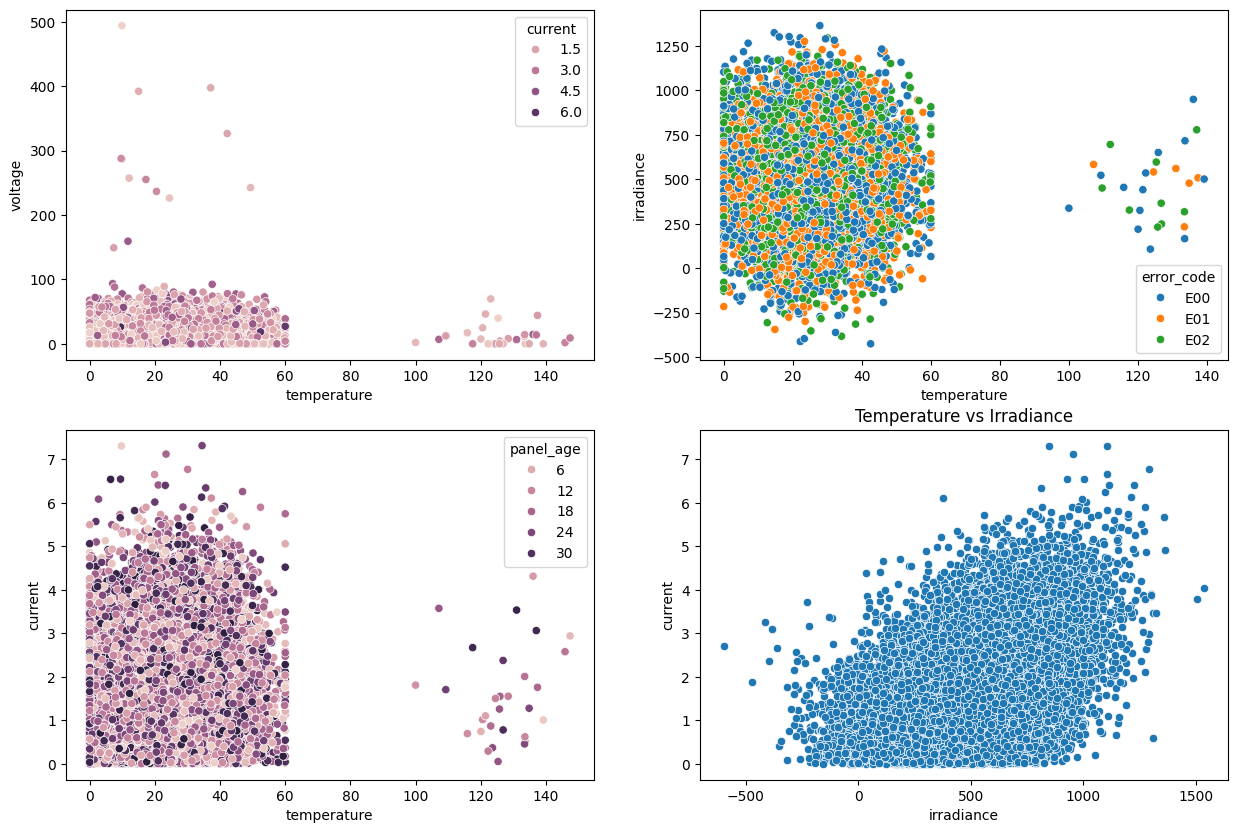

In [20]:
#bivariate analysis to get info on temprature
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x='temperature', y='voltage', data=train_df, ax=ax[0, 0],hue='current')
plt.title('Temperature vs Voltage')
sns.scatterplot(x='temperature', y='irradiance', data=train_df, ax=ax[0, 1],hue='error_code')
plt.title('Temperature vs Voltage')
sns.scatterplot(x='temperature', y='current', data=train_df, ax=ax[1, 0],hue ='panel_age')
plt.title('Temperature vs Voltage')
sns.scatterplot(x='irradiance', y='current', data=train_df, ax=ax[1, 1])
plt.title('Temperature vs Irradiance')

In [21]:
train_df.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure               135
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [22]:
#bivariate and multivariate analysis to get info on humidity

<Axes: xlabel='humidity', ylabel='voltage'>

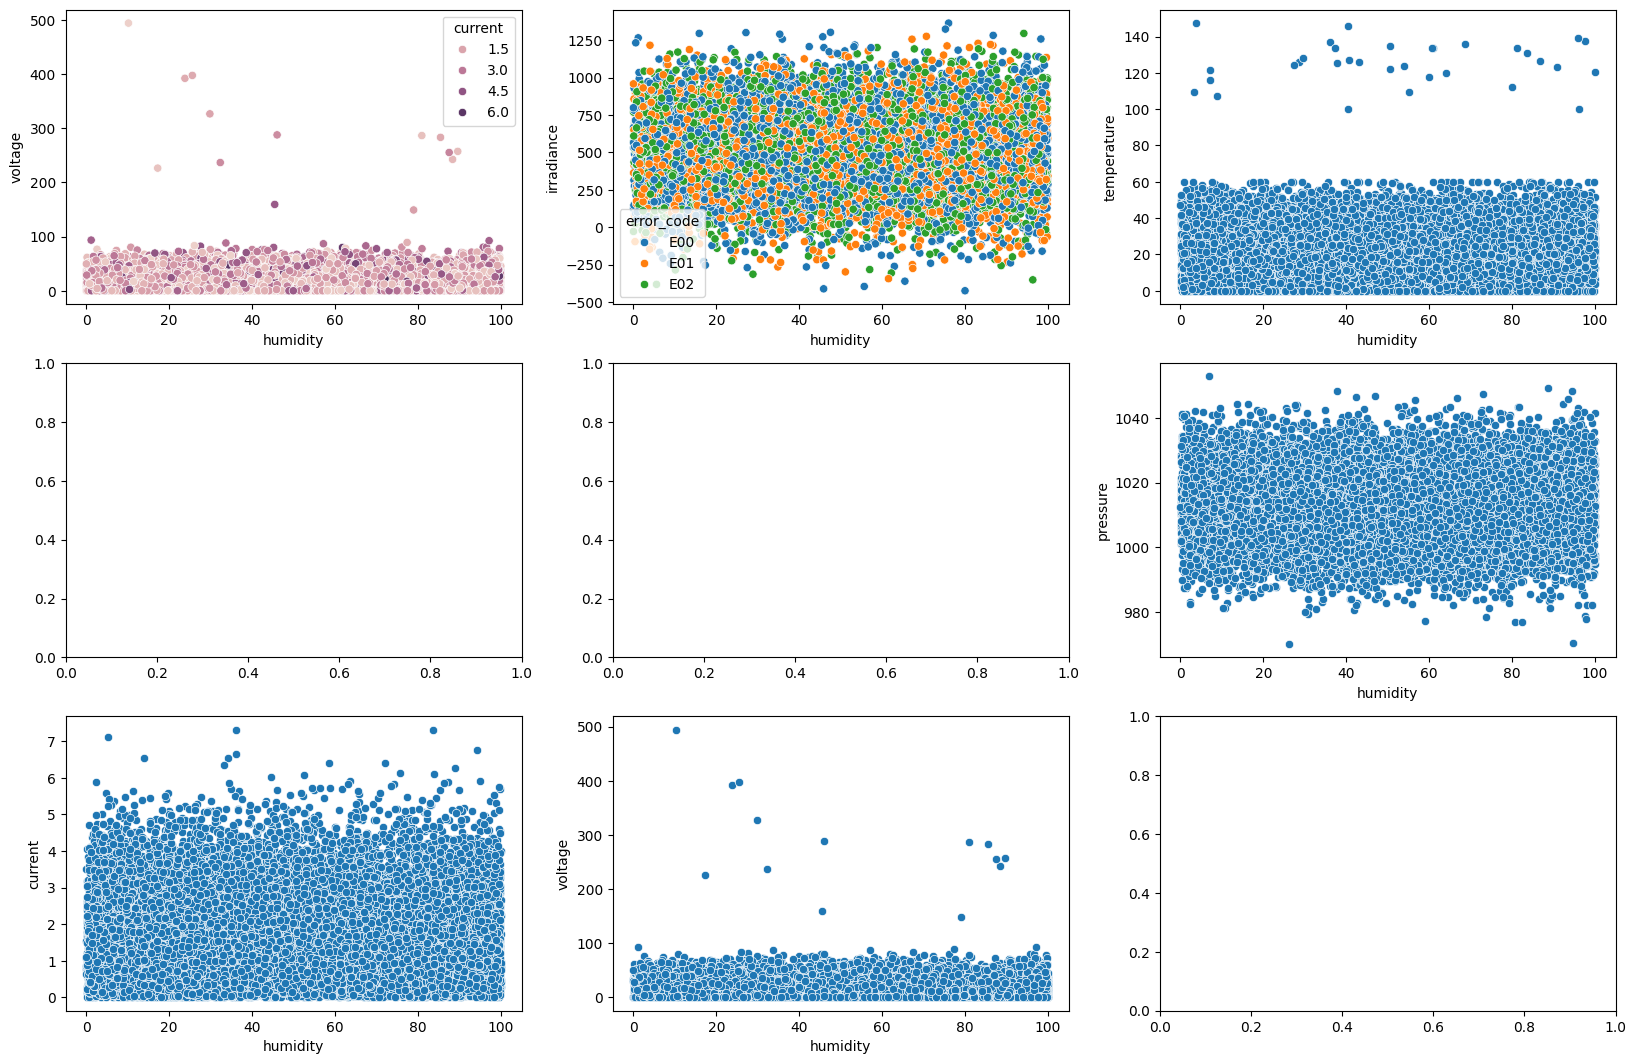

In [23]:
fig, ax = plt.subplots(3,3,figsize=(20, 13))
sns.scatterplot(x='humidity', y='voltage', data=train_df, ax=ax[0, 0], hue='current')
sns.scatterplot(x='humidity', y='irradiance', data=train_df, ax=ax[0, 1],hue='error_code')

sns.scatterplot(x='humidity', y='temperature', data=train_df, ax=ax[0, 2])
#sns.scatterplot(x='humidity', y='panel_age', data=train_df, ax=ax[1, 0]) not informative
#sns.scatterplot(x='humidity', y='wind_speed', data=train_df, ax=ax[1, 1]) not informative
sns.scatterplot(x='humidity', y='pressure', data=train_df, ax=ax[1, 2])
sns.scatterplot(x='humidity', y='current', data=train_df, ax=ax[2, 0])
sns.scatterplot(x='humidity', y='voltage', data=train_df, ax=ax[2, 1])



### Handling the missing values of all the column using iterative imputer

In [24]:
efficiency = train_df['efficiency']
iterative_df = train_df.drop(columns=['efficiency'])

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def impute_mixed_data(df, max_iter=10, n_estimators=10, random_state=42, clip_categorical=True):

    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

    # Copy the dataframe to avoid modifying original
    df_copy = df.copy()

    # Encode categorical columns with LabelEncoder after filling missing with "Unknown"
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_copy[col] = df_copy[col].fillna("Unknown")
        df_copy[col] = le.fit_transform(df_copy[col])
        label_encoders[col] = le

    # Apply IterativeImputer
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=n_estimators),
        max_iter=max_iter,
        random_state=random_state
    )
    df_imputed_array = imputer.fit_transform(df_copy)

    # Convert back to DataFrame
    df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

    # Decode categorical columns back to original labels
    for col in categorical_cols:
        df_imputed[col] = df_imputed[col].round().astype(int)

        if clip_categorical:
            le = label_encoders[col]
            df_imputed[col] = df_imputed[col].clip(lower=0, upper=len(le.classes_) - 1)

        le = label_encoders[col]
        df_imputed[col] = le.inverse_transform(df_imputed[col])

    return df_imputed, label_encoders

# Usage example:
# df = pd.read_csv("train.csv")
# df_imputed, label_encoders = impute_mixed_data(df)
# df_imputed.to_csv("train_imputed.csv", index=False)
# print("✅ All missing values filled and saved to 'train_imputed.csv'")
df_imputed, label_encoders = impute_mixed_data(iterative_df)

C:\Users\tusha\AppData\Roaming\Python\Python313\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [26]:
df_imputed.isnull().sum()

id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
dtype: int64

### Remove outliers


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

def cap_outliers(df, z_threshold=3):
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df_numeric))
    
    # Define upper and lower limits for each column
    upper_limits = df_numeric.mean() + z_threshold * df_numeric.std()
    lower_limits = df_numeric.mean() - z_threshold * df_numeric.std()
    
    # Clip values within the defined threshold
    df_capped = df_numeric.clip(lower=lower_limits, upper=upper_limits, axis=1)
    
    # Restore non-numeric columns
    df_cleaned = df.copy()
    df_cleaned[df_numeric.columns] = df_capped
    
    return df_cleaned

In [28]:
df_imputed_new = cap_outliers(df_imputed)

### feature engineering

In [29]:
def new_feature(df):
    df = df.copy()
    #ccreates new features based on existing ones

    #cooling effect
    df['Cooling_effect'] = df['irradiance'] * (1 - df['humidity']/100)
    
    return df
    
    
    

In [30]:
df_imputed_new = new_feature(df_imputed_new)

In [31]:
def more_new_feature(df):
    df = df.copy()
    
    #soil loss ratio
    df['soiling_loss_ratio'] = df['soiling_ratio'] / (df['irradiance'] + 1e-5)
    
    # irradiance interactions
    df['irradiance_squared'] = df['irradiance'] ** 2
    
    #degradation factor
    df['degradation_index'] = df['panel_age'] * df['soiling_ratio'] * (df['module_temperature'] / 100)

    # normalized temperature
    df['normalized_temperature'] = df['temperature'] / (df['irradiance'] + 1e-5)
    
    # temperature and irradiance interaction
    df['temp_irradiance'] = df['temperature'] * df['irradiance']
    # irradiance to current ratio
    df['irradiance_to_current_ratio'] = df['irradiance'] / (df['current'] + 1e-5)
    
    

    
    
    return df

In [32]:
df_imputed_new1 = more_new_feature(df_imputed_new)

In [33]:
df_imputed_new1.columns.value_counts()

id                             1
temperature                    1
irradiance                     1
humidity                       1
panel_age                      1
maintenance_count              1
soiling_ratio                  1
voltage                        1
current                        1
module_temperature             1
cloud_coverage                 1
wind_speed                     1
pressure                       1
string_id                      1
error_code                     1
installation_type              1
Cooling_effect                 1
soiling_loss_ratio             1
irradiance_squared             1
degradation_index              1
normalized_temperature         1
temp_irradiance                1
irradiance_to_current_ratio    1
Name: count, dtype: int64

### Model Making Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error
# Prepare the data for training
X = df_imputed_new1.drop([ 'error_code', 'string_id', 'installation_type','maintenance_count','id','voltage','humidity','wind_speed','pressure',
                        'current','temperature'], axis=1)
y = efficiency
# Convert categorical columns to numerical using label encoders
for col in X.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        X[col] = label_encoders[col].transform(X[col])
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2)
# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [35]:
X.columns


Index(['irradiance', 'panel_age', 'soiling_ratio', 'module_temperature',
       'cloud_coverage', 'Cooling_effect', 'soiling_loss_ratio',
       'irradiance_squared', 'degradation_index', 'normalized_temperature',
       'temp_irradiance', 'irradiance_to_current_ratio'],
      dtype='object')

In [36]:
# Make predictions on the validation set
y_pred = rf.predict(X_val)

In [37]:
# analyze the model's performance
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.6f}")

#root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.6f}")


Mean Squared Error: 0.011476
Root Mean Squared Error: 0.107126


### XGBoost regression

In [38]:
# use Xgboost regression model
import xgboost as xgb
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=1.0,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=5,
    min_child_weight=5,
    max_delta_step=1,
    random_state=42
)
# Train the XGBoost model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=1, max_depth=2,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
# predict on new model
y_pred_xgb = xgb_model.predict(X_val)
# analyze the model's performance
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb:.6f}")
print(f"XGBoost Root Mean Squared Error: {np.sqrt(mse_xgb):.6f}")

XGBoost Mean Squared Error: 0.011283
XGBoost Root Mean Squared Error: 0.106222


### kfold with Xgboost

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# Initialize
kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=1.0,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=5,
    min_child_weight=5,
    max_delta_step=1,
    random_state=42
)

# OOF storage
oof_preds = np.zeros(len(X))  # Same size as training data
mse_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"🔁 Fold {fold+1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model.fit(X_train, y_train)
    y_val_pred = xgb_model.predict(X_val)

    oof_preds[val_idx] = y_val_pred  # Store out-of-fold predictions
    fold_mse = mean_squared_error(y_val, y_val_pred)
    mse_list.append(fold_mse)

# Final evaluation
rmse = np.sqrt(mean_squared_error(y, oof_preds))
print(f"\n📉 Fold MSEs: {mse_list}")
print(f"✅ Final OOF RMSE: {rmse:.6f}")

🔁 Fold 1
🔁 Fold 2
🔁 Fold 3
🔁 Fold 4
🔁 Fold 5

📉 Fold MSEs: [0.011321539835552327, 0.010047071493887288, 0.009474392749688023, 0.010713171634284827, 0.01145696001426696]
✅ Final OOF RMSE: 0.102969


### gridsearch takes a lot of time xgboost model

In [41]:
"""from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 3, 5]  # L2 regularization
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)"""

'from sklearn.model_selection import GridSearchCV\nimport xgboost as xgb\n\n# Define hyperparameter grid for tuning\nparam_grid = {\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'max_depth\': [3, 5, 7],\n    \'n_estimators\': [100, 300, 500],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'gamma\': [0, 0.1, 0.3],\n    \'reg_alpha\': [0, 0.1, 0.5],  # L1 regularization\n    \'reg_lambda\': [1, 3, 5]  # L2 regularization\n}\n\n# Perform hyperparameter tuning using GridSearchCV\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=\'r2\', n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Get best hyperparameters\nbest_params = grid_search.best_params_\nprint("Best Hyperparameters:", best_params)'

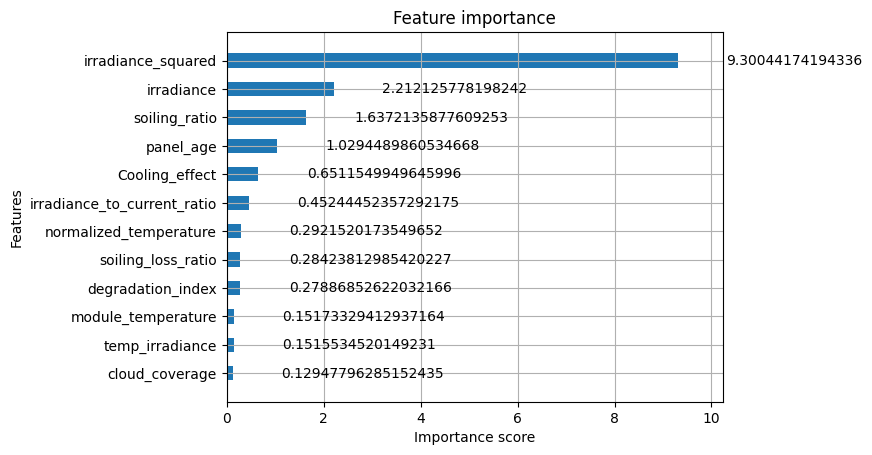

In [42]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, importance_type='gain', height=0.5)
plt.show()


In [43]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=xgb_model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)


Selected Features by RFE: Index(['irradiance', 'panel_age', 'soiling_ratio', 'module_temperature',
       'Cooling_effect', 'soiling_loss_ratio', 'irradiance_squared',
       'degradation_index', 'normalized_temperature',
       'irradiance_to_current_ratio'],
      dtype='object')


Text(0.5, 1.0, 'Feature Importance')

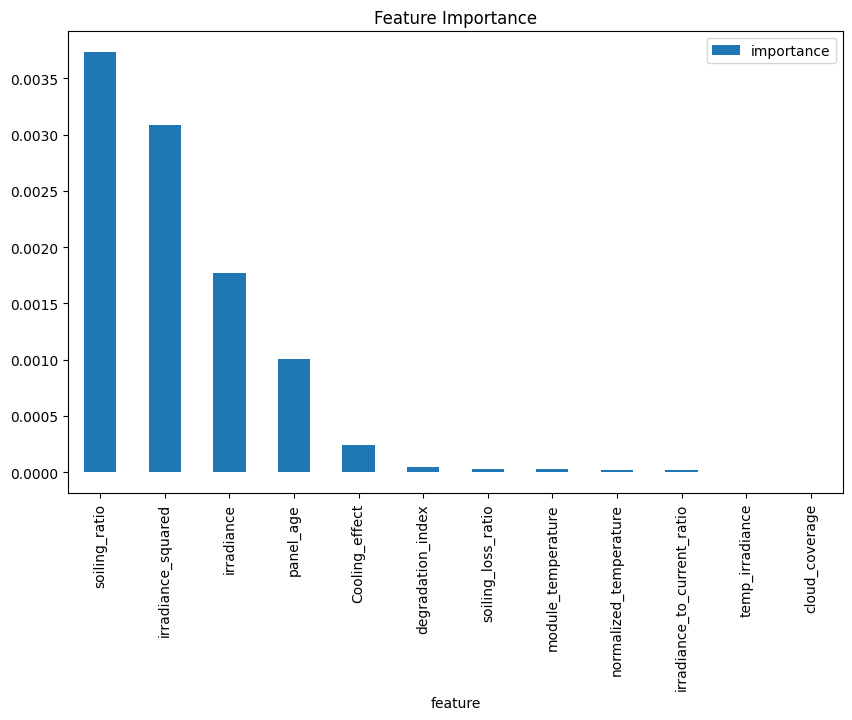

In [44]:
from sklearn.inspection import permutation_importance

results = permutation_importance(xgb_model, X_val, y_val, scoring='neg_mean_squared_error')
importance_df = pd.DataFrame({'feature': X_val.columns, 'importance': results.importances_mean})
importance_df.sort_values(by='importance', ascending=False).plot.bar(x='feature', y='importance', figsize=(10,6))
plt.title('Feature Importance')

In [45]:
import seaborn as sns
import numpy as np

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)


Highly correlated features to drop: ['irradiance_squared']


#### Using randomzied Cv For hyperparameter testing

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

#xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 300, 500, 700],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'max_delta_step': [0, 1, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 combinations
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'max_delta_step': 1, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


### LightGradientBoost Model

In [47]:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.6}

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'subsample': 0.6}

In [48]:
#lgbm model
from lightgbm import LGBMRegressor
# Initialize the LightGBM regressor
lgbm_model = LGBMRegressor(
    n_estimators= 80,
    max_depth=3,
    learning_rate=0.099,
    subsample=0.1,
    colsample_bytree=0.85,
    reg_alpha=0.5,
    reg_lambda=1.0,
    min_child_weight=3,
    max_delta_step=0,
    random_state=42,
    n_jobs=-1
)
# Train the LightGBM model
lgbm_model.fit(X_train, y_train)
# Predict on the validation set


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.510563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(colsample_bytree=0.85, learning_rate=0.099, max_delta_step=0,
              max_depth=3, min_child_weight=3, n_estimators=80, n_jobs=-1,
              random_state=42, reg_alpha=0.5, reg_lambda=1.0, subsample=0.1)

In [49]:
#predict on new model
y_pred_lgbm = lgbm_model.predict(X_val)
# analyze the model's performance
mse_lgbm = mean_squared_error(y_val, y_pred_lgbm)
print(f"LightGBM Mean Squared Error: {mse_lgbm:.6f}")
print(f"LightGBM Root Mean Squared Error: {np.sqrt(mse_lgbm):.6f}")

LightGBM Mean Squared Error: 0.011514
LightGBM Root Mean Squared Error: 0.107301


### Takes time for finding the lgbm hypertunning 

In [50]:
"""# hyperparameter tuning for LightGBM
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid for tuning
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 3, 5]  # L2 regularization
}
# Perform hyperparameter tuning using GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='r2', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)
# Get best hyperparameters
best_params_lgbm = grid_search_lgbm.best_params_
print("Best Hyperparameters for LightGBM:", best_params_lgbm)"""


'# hyperparameter tuning for LightGBM\nfrom lightgbm import LGBMRegressor\nfrom sklearn.model_selection import GridSearchCV\n# Define hyperparameter grid for tuning\nparam_grid_lgbm = {\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'max_depth\': [3, 5, 7],\n    \'n_estimators\': [100, 300, 500],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'reg_alpha\': [0, 0.1, 0.5],  # L1 regularization\n    \'reg_lambda\': [1, 3, 5]  # L2 regularization\n}\n# Perform hyperparameter tuning using GridSearchCV\ngrid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring=\'r2\', n_jobs=-1)\ngrid_search_lgbm.fit(X_train, y_train)\n# Get best hyperparameters\nbest_params_lgbm = grid_search_lgbm.best_params_\nprint("Best Hyperparameters for LightGBM:", best_params_lgbm)'

### lgbm with kfold



In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import numpy as np

# Initialize
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lgbm_model = LGBMRegressor(
    n_estimators=80,
    max_depth=3,
    learning_rate=0.099,
    subsample=0.1,
    colsample_bytree=0.85,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

# OOF storage
oof_preds = np.zeros(len(X))  # Same size as training data
mse_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"🔁 Fold {fold+1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    lgbm_model.fit(X_train, y_train)
    y_val_pred = lgbm_model.predict(X_val)

    oof_preds[val_idx] = y_val_pred  # ← Store out-of-fold predictions
    fold_mse = mean_squared_error(y_val, y_val_pred)
    mse_list.append(fold_mse)

# Final evaluation
rmse = np.sqrt(mean_squared_error(y, oof_preds))
print(f"\n📉 Fold MSEs: {mse_list}")
print(f"✅ Final OOF RMSE: {rmse:.6f}")


🔁 Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.511069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [52]:
#kfold with lgbm
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lgbm_model = LGBMRegressor(
    n_estimators= 80,
    max_depth=3,
    learning_rate=0.099,
    subsample=0.1,
    colsample_bytree=0.85,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
    
)
mse_list = []
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    lgbm_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = lgbm_model.predict(X_val_fold)
    
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    mse_list.append(mse_fold)
print(f"Mean Squared Error for each fold: {mse_list}")
print(f"Average Mean Squared Error: {np.mean(mse_list):.6f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.511069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### Stacking with interaction

In [53]:
#Not used model no need REMOVE
# Stacking model with xgb lgbm and catboost
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
# Initialize the CatBoost regressor
catboost_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.05,
    depth=5,
    random_seed=42,
    verbose=0,
    early_stopping_rounds=10,
    l2_leaf_reg=3,
    bagging_temperature=0.1,
    subsample=0.8,
    colsample_bylevel=0.8
)
# Initialize the Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('catBoost', catboost_model)
    ],
    final_estimator=xgb_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)
# Predict on the validation set
y_pred_stacking = stacking_model.predict(X_val)
# analyze the model's performance
mse_stacking = mean_squared_error(y_val, y_pred_stacking)
print(f"Stacking Model Mean Squared Error: {mse_stacking:.6f}")
print(f"Stacking Model Root Mean Squared Error: {np.sqrt(mse_stacking):.6f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.510563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### Hist Gradient boost using kfolds and lasso cv


In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# LassoCV for feature selection
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 0, 50),  # Tuning alpha values
    cv=kf,
    max_iter=10000,
    random_state=42
)
lasso_cv.fit(X, y)  # Fit LassoCV on full data
X_transformed = X * (lasso_cv.coef_ != 0)  # Keep only important features

# HistGradientBoosting model
hgb_model = HistGradientBoostingRegressor(
    max_depth=3,
    learning_rate=0.099,
    max_iter=80,
    l2_regularization=0.5,
    random_state=42
)

# OOF storage
oof_preds = np.zeros(len(X))
mse_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_transformed)):
    print(f"🔁 Fold {fold+1}")

    X_train, X_val = X_transformed.iloc[train_idx], X_transformed.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    hgb_model.fit(X_train, y_train)
    y_val_pred = hgb_model.predict(X_val)

    oof_preds[val_idx] = y_val_pred  # Store out-of-fold predictions
    fold_mse = mean_squared_error(y_val, y_val_pred)
    mse_list.append(fold_mse)

# Final evaluation
rmse = np.sqrt(mean_squared_error(y, oof_preds))
print(f"\n🔧 Optimal Alpha from Lasso: {lasso_cv.alpha_}")
print(f"📉 Fold MSEs: {mse_list}")
print(f"✅ Final OOF RMSE: {rmse:.6f}")

🔁 Fold 1
🔁 Fold 2
🔁 Fold 3
🔁 Fold 4
🔁 Fold 5

🔧 Optimal Alpha from Lasso: 0.0001
📉 Fold MSEs: [0.011313653835013548, 0.010096673932552416, 0.009495021861685675, 0.010713588349147972, 0.011484230329449145]
✅ Final OOF RMSE: 0.103056


### Final stack of three models xgboost,histgradient,lgbm 

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge  # Meta-Learner
from sklearn.metrics import mean_squared_error

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store Out-of-Fold Predictions
oof_preds_xgb = np.zeros(len(X))
oof_preds_lgbm = np.zeros(len(X))
oof_preds_hgb = np.zeros(len(X))

# Train Each Model
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Train each model
    xgb_model.fit(X_train, y_train)
    lgbm_model.fit(X_train, y_train)
    hgb_model.fit(X_train, y_train)

    # Generate validation predictions
    oof_preds_xgb[val_idx] = xgb_model.predict(X_val)
    oof_preds_lgbm[val_idx] = lgbm_model.predict(X_val)
    oof_preds_hgb[val_idx] = hgb_model.predict(X_val)

# Create Meta-Features (Stacked Dataset)
stacked_features = np.column_stack((oof_preds_xgb, oof_preds_lgbm, oof_preds_hgb))

# Train Meta-Learner (Ridge Regression)
meta_model = Ridge(alpha=1.0)
meta_model.fit(stacked_features, y)

# Final Evaluation
stacked_rmse = np.sqrt(mean_squared_error(y, meta_model.predict(stacked_features)))
print(f"✅ Stacked Model RMSE: {stacked_rmse:.6f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.511069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### Cross validating with kfold and seeing whether the perfornce is good or not or overfitting

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

def k_fold_validation(model, X, y, k=5):
    """
    Performs K-Fold Cross Validation on a given model.

    Parameters:
    - model: Sklearn model instance (e.g., RandomForestRegressor)
    - X: Features (numpy array or pandas DataFrame)
    - y: Target variable
    - k: Number of folds (default=5)

    Returns:
    - scores: Dictionary containing validation scores (Mean Absolute Error & R^2)
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    mae_scores = []
    r2_scores = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_val)  # Predict on validation set
        
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))
    
    scores = {
        "Mean Absolute Error": np.mean(mae_scores),
        "R^2 Score": np.mean(r2_scores)
    }
    
    return scores


In [57]:
"""results = k_fold_validation(rf, X, efficiency, k=5)
print("K-Fold Validation Results:")
print(f"Mean Absolute Error: {results['Mean Absolute Error']:.6f}")
print(f"R^2 Score: {results['R^2 Score']:.6f}")
print("root_mean_squared_error:", rmse)"""

'results = k_fold_validation(rf, X, efficiency, k=5)\nprint("K-Fold Validation Results:")\nprint(f"Mean Absolute Error: {results[\'Mean Absolute Error\']:.6f}")\nprint(f"R^2 Score: {results[\'R^2 Score\']:.6f}")\nprint("root_mean_squared_error:", rmse)'

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

def check_overfitting(model, X_train, y_train, X_val, y_val, threshold=1.5):
    """
    Evaluates if the model is overfitting based on training and validation performance.
    
    Parameters:
    - model: trained model (must implement .predict())
    - X_train, y_train: training features and labels
    - X_val, y_val: validation features and labels
    - threshold: float, ratio of val/train error to flag overfitting (default 1.5)
    
    Returns:
    - "Dictionary with MSE, R2, and overfitting decision
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Overfitting logic
    overfit = val_mse / train_mse > threshold if train_mse != 0 else True
    decision = "Yes" if overfit else "No"

    return {
        "Train MSE": train_mse,
        "Val MSE": val_mse,
        "Train R2": train_r2,
        "Val R2": val_r2,
        "Overfitting?": decision
    }

In [59]:
result_overfitting = check_overfitting(lgbm_model, X_train, y_train, X_val, y_val)
print("Overfitting Check Results:")
for key, value in result_overfitting.items():
    print(f"{key}: {value:.6f}" if isinstance(value, float) else f"{key}: {value}")



Overfitting Check Results:
Train MSE: 0.009893
Val MSE: 0.011514
Train R2: 0.498393
Val R2: 0.415190
Overfitting?: No


In [60]:
#evaluate overfitting for xgboost model
result_overfitting_xgb = check_overfitting(xgb_model, X_train, y_train, X_val, y_val)
print("Overfitting Check Results for XGBoost:")
for key, value in result_overfitting_xgb.items():
    print(f"{key}: {value:.6f}" if isinstance(value, float) else f"{key}: {value}")

Overfitting Check Results for XGBoost:
Train MSE: 0.010080
Val MSE: 0.011457
Train R2: 0.488921
Val R2: 0.418066
Overfitting?: No


### Feature Importance


Feature Importances:


<Axes: >

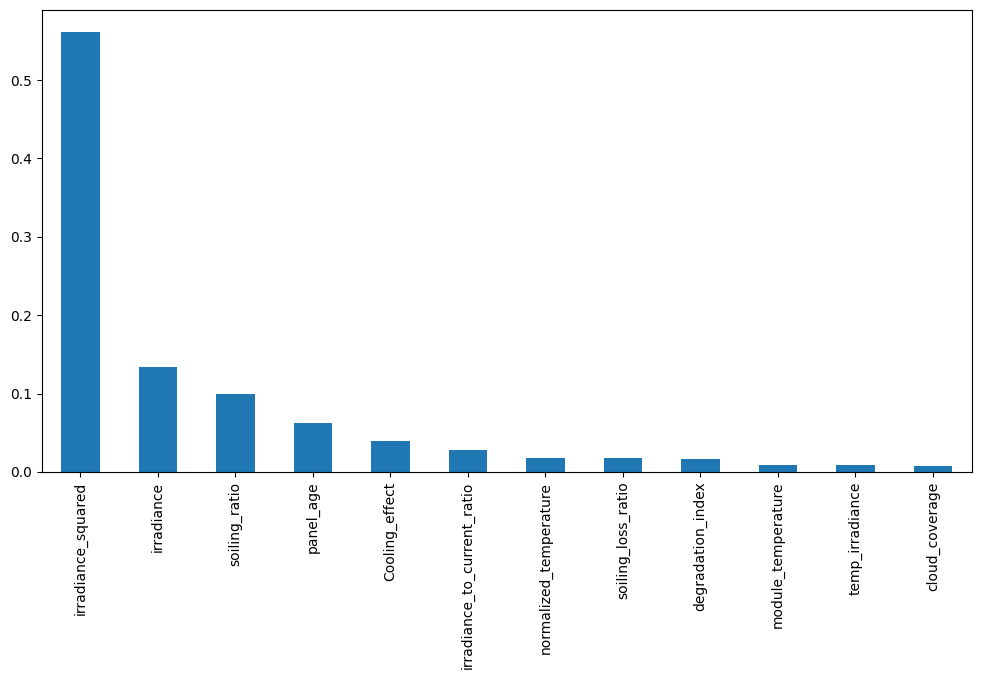

In [61]:
#feature_importances = rf.feature_importances_
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
#visualize feature importances
feature_importances.plot(kind='bar', figsize=(12, 6))

In [62]:
print(feature_importances)

irradiance_squared             0.561253
irradiance                     0.133495
soiling_ratio                  0.098801
panel_age                      0.062124
Cooling_effect                 0.039295
irradiance_to_current_ratio    0.027304
normalized_temperature         0.017630
soiling_loss_ratio             0.017153
degradation_index              0.016829
module_temperature             0.009157
temp_irradiance                0.009146
cloud_coverage                 0.007814
dtype: float32


#### Processing the test dataset


In [63]:
test_df = pd.read_csv('test.csv')
# Preprocess the test data similarly to the training data
test_df['humidity'] = pd.to_numeric(test_df['humidity'], errors='coerce')
test_df['humidity'] = test_df['humidity'].astype(float)
test_df['wind_speed'] = pd.to_numeric(test_df['wind_speed'], errors='coerce')
test_df['wind_speed'] = test_df['wind_speed'].astype(float)
test_df['pressure'] = pd.to_numeric(test_df['pressure'], errors='coerce')
test_df['pressure'] = test_df['pressure'].astype(float)
# Drop unnecessary columns
test_df = test_df.drop(columns=['string_id', 'error_code', 'installation_type', 'id'])
# Apply the same preprocessing steps as for the training data
test_df_imputed, _ = impute_mixed_data(test_df)         
# Cap outliers in the test data
test_df_imputed = cap_outliers(test_df_imputed)
# Create new features in the test data
test_df_imputed = new_feature(test_df_imputed)
# Create additional new features in the test data
test_df_imputed = more_new_feature(test_df_imputed)

# Prepare the test data for prediction
X_test = test_df_imputed.drop(columns=['voltage', 'humidity', 'wind_speed'])
# drop columns that are not in the training set
X_test = X_test[X_train.columns.intersection(X_test.columns)]

# Convert categorical columns to numerical using label encoders
for col in X_test.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        X_test[col] = label_encoders[col].transform(X_test[col])
# Make predictions on the test set


C:\Users\tusha\AppData\Roaming\Python\Python313\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
#print(set(X_train.columns) - set(X_test.columns))  # Columns in X_train but missing in X_test
print(set(X_test.columns) - set(X_train.columns))  # Columns in X_test but missing in X_train

set()


In [65]:
X_test = X_test[X_train.columns]  # Select only the columns present during training

In [66]:
X_test

,irradiance,panel_age,soiling_ratio,module_temperature,cloud_coverage,Cooling_effect,soiling_loss_ratio,irradiance_squared,degradation_index,normalized_temperature,temp_irradiance,irradiance_to_current_ratio
0,85.449838,13.910963,0.889765,19.517274,33.509889,7.848206,0.010413,7301.674789,2.415749,0.206184,1505.487661,1236.409983
1,722.801748,20.916528,0.590372,37.421443,32.327060,571.136308,0.000817,522442.367109,4.620996,0.048182,25172.527489,421.738593
2,485.491998,1.446962,0.611425,32.147763,69.613333,215.490237,0.001259,235702.480507,0.284414,0.069573,16398.431240,286.097456
3,350.022720,18.810133,0.704656,25.734118,42.862760,178.354895,0.002013,122515.904785,3.410974,0.053094,6504.888252,444.643709
4,437.295622,17.353924,0.564938,47.499457,51.025763,398.981654,0.001292,191227.461073,4.656797,0.098434,18823.350000,234.144730
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,492.446562,4.508170,0.790952,48.476050,14.015174,317.647671,0.001606,242503.616579,1.728533,0.082408,19984.297066,143.381670
11996,198.844667,4.021203,0.810999,23.502657,22.788465,190.763985,0.004079,39539.201427,0.766466,0.085285,3372.112145,154.099935
11997,757.621634,15.253932,0.664800,31.908375,98.197373,736.425882,0.000877,573990.540451,3.235770,0.031751,18224.840729,156.671322
11998,177.376256,16.437613,0.861087,23.835495,9.581184,176.185974,0.004855,31462.336072,3.373728,0.088082,2771.277809,153.033316


In [67]:
y_test_pred = rf.predict(X_test)
# Create a DataFrame for the predictions
df_new = pd.read_csv('test.csv')
predictions_df = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': y_test_pred
})
# Save the predictions to a CSV file
predictions_df.to_csv('test_predictions.csv', index=False)


In [68]:
y_test_pred_xgb = xgb_model.predict(X_test)
# Create a DataFrame for the XGBoost predictions
predictions_df_xgb = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': y_test_pred_xgb
})
# Save the XGBoost predictions to a CSV file
predictions_df_xgb.to_csv('test_predictions_xgb.csv', index=False)

In [69]:
#prdection throught lgbm model
y_test_pred_lgbm = lgbm_model.predict(X_test)
# Create a DataFrame for the LightGBM predictions
predictions_df_lgbm = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': y_test_pred_lgbm
})
# Save the LightGBM predictions to a CSV file
predictions_df_lgbm.to_csv('test_predictions_lgbm.csv', index=False)


In [70]:
# K-Fold Cross-Validation with XGBoost
xg_test_preds = np.zeros(len(X_test))

for train_idx, val_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    xgb_model.fit(X_train, y_train)
    xg_test_preds += xgb_model.predict(X_test) / kf.n_splits

# Create a DataFrame for the K-Fold XGBoost predictions
predictions_df_kfold_xgb = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': xg_test_preds
})

# Save the K-Fold XGBoost predictions to a CSV file
predictions_df_kfold_xgb.to_csv('test_predictions_kfold_xgb.csv', index=False)

In [71]:
# K-Fold Cross-Validation with lgbm
lgb_test_preds = np.zeros(len(X_test))

for train_idx, val_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    lgbm_model.fit(X_train, y_train)
    lgb_test_preds += lgbm_model.predict(X_test) / kf.n_splits
# Create a DataFrame for the K-Fold LightGBM predictions
predictions_df_kfold_lgbm = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': lgb_test_preds
})
# Save the K-Fold LightGBM predictions to a CSV file
predictions_df_kfold_lgbm.to_csv('test_predictions_kfold_lgbm.csv', index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.511069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [72]:
#histgradient prediction with k folds and lassso cv

# Apply Lasso feature selection on test data
X_test_transformed = X_test * (lasso_cv.coef_ != 0)

hist_test_preds = np.zeros(len(X_test_transformed))

for train_idx, val_idx in kf.split(X_transformed):
    X_train, y_train = X_transformed.iloc[train_idx], y.iloc[train_idx]
    hgb_model.fit(X_train, y_train)
    hist_test_preds += hgb_model.predict(X_test_transformed) / kf.n_splits

# Create a DataFrame for predictions
predictions_df_hgb_lasso = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': hist_test_preds
})

# Save predictions to CSV
predictions_df_hgb_lasso.to_csv('test_predictions_hgb_lasso.csv', index=False)

In [73]:
# Stacking Model Predictions
# Generate Test Predictions
test_preds_xgb = xgb_model.predict(X_test)
test_preds_lgbm = lgbm_model.predict(X_test)
test_preds_hgb = hgb_model.predict(X_test)

# Create Meta Features for Test Set
test_stacked_features = np.column_stack((test_preds_xgb, test_preds_lgbm, test_preds_hgb))

# Make Final Predictions using Stacked Model
final_preds = meta_model.predict(test_stacked_features)

# Save Predictions to CSV
predictions_df_stacked = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': final_preds
})

predictions_df_stacked.to_csv('FINAL_STACK_test_predictions_stacked.csv', index=False)

In [74]:
df_aayush  = pd.read_csv('submission_enriched_stackedv2.csv')
aayush_pred = df_aayush['efficiency']


## BESt model so far accuracy of 89.90197

In [75]:
##
#aayush model and model combination
final_predictions = (0.6 * aayush_pred) +(0.34 * final_preds)
# Create a DataFrame for the final predictions
final_predictions_df = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': final_predictions
})
# Save the final predictions to a CSV file
final_predictions_df.to_csv('combine_preds_final_test_predictions.csv', index=False)

### Erorr Analysis


In [76]:
new_prediction = (0.5*xg_test_preds) + (0.5*lgb_test_preds)
# Create a DataFrame for the new final predictions
new_predictions_df = pd.DataFrame({
    'id': df_new['id'],
    'efficiency': new_prediction
})
# Save the new final predictions to a CSV file
new_predictions_df.to_csv('new_kfold_predictions.csv', index=False)